# Environment and Data

In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Feature Selection
from sklearn.feature_selection import VarianceThreshold

# Clustering (for later)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality Reduction Visualization (optional)
import plotly.express as px

# Display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/didodeboodt/Documents/Projects/Berlin_Housing_Affordability/data/master_tables/berlin_final_master_table.csv')

# Data Validation

In [ ]:
# Data overview
print("Shape:", df.shape)
df.info()

Shape: (96, 178)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 178 entries, bezirk to district_avg_buy_m2
dtypes: float64(113), int64(62), object(3)
memory usage: 133.6+ KB


In [5]:
# Count missing values
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

# Display only columns with missing values
missing = pd.DataFrame({'Missing Values': missing_counts, 'Percent': missing_percent})
missing = missing[missing['Missing Values'] > 0].sort_values('Percent', ascending=False)
display(missing)

,Missing Values,Percent
medical,96,100.000000
subdistrict_population_age_95_plus,5,5.208333
subdistrict_senior_population,5,5.208333
subdistrict_senior_share,5,5.208333
subdistrict_middle_age_population,5,5.208333
subdistrict_population_age_90_95,1,1.041667


In [6]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [7]:
# Check for unexpected spelling or inconsistencies
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} — Unique values:\n", df[col].unique())


bezirk — Unique values:
 ['treptow-koepenick' 'lichtenberg' 'marzahn-hellersdorf' 'pankow'
 'reinickendorf' 'neukoelln' 'charlottenburg-wilmersdorf'
 'steglitz-zehlendorf' 'spandau' 'tempelhof-schoeneberg'
 'friedrichshain-kreuzberg' 'mitte']

ortsteil — Unique values:
 ['adlershof' 'alt-hohenschoenhausen' 'alt-treptow' 'altglienicke'
 'baumschulenweg' 'biesdorf' 'blankenburg' 'blankenfelde' 'bohnsdorf'
 'borsigwalde' 'britz' 'buch' 'buckow' 'charlottenburg'
 'charlottenburg-nord' 'dahlem' 'falkenberg' 'falkenhagener feld'
 'fennpfuhl' 'franzoesisch buchholz' 'friedenau' 'friedrichsfelde'
 'friedrichshagen' 'friedrichshain' 'frohnau' 'gatow' 'gesundbrunnen'
 'gropiusstadt' 'grunewald' 'gruenau' 'hakenfelde' 'halensee'
 'hansaviertel' 'haselhorst' 'heiligensee' 'heinersdorf' 'hellersdorf'
 'hermsdorf' 'johannisthal' 'karlshorst' 'karow' 'kaulsdorf' 'kladow'
 'konradshoehe' 'kreuzberg' 'koepenick' 'lankwitz' 'lichtenberg'
 'lichtenrade' 'lichterfelde' 'luebars' 'mahlsdorf' 'malchow' 'ma

In [ ]:
# Data type validation
non_numeric_cols = df.select_dtypes(include='object').columns
for col in df.columns:
    if col not in ['ortsteil', 'bezirk', 'classification_category'] and df[col].dtype == 'object':
        print(f"⚠️  Column '{col}' is not numeric. Example values:\n{df[col].unique()[:5]}")

In [9]:
# Basic summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subdistrict_population_age_0_5,96.0,1932.364583,1914.479207,35.000,645.000000,1340.000000,2470.250000,8770.0000
subdistrict_population_age_5_10,96.0,1801.802083,1696.456304,27.000,569.250000,1301.500000,2559.500000,8049.0000
subdistrict_population_age_10_15,96.0,1662.104167,1559.300258,16.000,546.000000,1162.500000,2447.500000,7239.0000
subdistrict_population_age_15_20,96.0,1544.729167,1417.430852,21.000,530.500000,1046.000000,2099.250000,6247.0000
subdistrict_population_age_20_25,96.0,2086.114583,2145.640490,24.000,586.750000,1345.500000,2587.500000,8911.0000
...,...,...,...,...,...,...,...,...
district_min_rent_m2,96.0,10.754095,1.042207,9.186,10.100000,10.475714,11.661667,14.1700
district_avg_rent_m2,96.0,14.277625,1.279424,12.830,13.327143,13.957778,14.773333,16.9825
district_max_rent_m2,96.0,23.148043,2.715806,20.272,21.436667,22.038889,23.458333,29.1850
district_min_Buy_m2,96.0,3293.043538,286.026565,2678.400,3093.785714,3329.363636,3469.444444,3856.0000


In [ ]:
# Sanity check: total population vs age groups
age_cols = [col for col in df.columns if 'subdistrict_population_age' in col]
df['age_group_sum'] = df[age_cols].sum(axis=1)

# Compare to total_population
df['pop_diff'] = df['total_population'] - df['age_group_sum']
print(df[['ortsteil', 'total_population', 'age_group_sum', 'pop_diff']].sort_values(by='pop_diff', key=abs).head())

           ortsteil  total_population  age_group_sum  pop_diff
0         adlershof             20210        20210.0       0.0
69        rahnsdorf              9856         9856.0       0.0
68  prenzlauer berg            165055       165055.0       0.0
67     plaenterwald             11299        11299.0       0.0
66           pankow             65375        65375.0       0.0


# Feature Engineering

**Demographic Features**

In [13]:
# Age diversity
age_columns = [col for col in df.columns if "subdistrict_population_age_" in col]
df["age_std_dev"] = df[age_columns].std(axis=1)

In [ ]:
# Total POIs per subdistrict
poi_columns = [col for col in df.columns if col not in ["ortsteil", "bezirk", "total_population", "subdistrict_area_km2"] and df[col].dtype in [int, float]]
df["total_pois"] = df[poi_columns].sum(axis=1)

In [15]:
# Green POI ratio
green_pois = ["park", "grass", "forest", "wood", "meadow", "garden", "nature_reserve"]
green_cols = [col for col in green_pois if col in df.columns]

df["green_poi_total"] = df[green_cols].sum(axis=1)
df["green_poi_ratio"] = df["green_poi_total"] / df["total_pois"]

In [16]:
# Food and drink density (per 1000 people)
food_drink = ["restaurant", "cafe", "bar", "fast_food", "nightclub"]
available = [col for col in food_drink if col in df.columns]

df["food_drink_total"] = df[available].sum(axis=1)
df["food_drink_density"] = df["food_drink_total"] / df["total_population"] * 1000

In [17]:
# Education per 1000 people
education = ["school", "kindergarten", "university"]
available_edu = [col for col in education if col in df.columns]

df["education_total"] = df[available_edu].sum(axis=1)
df["education_density"] = df["education_total"] / df["total_population"] * 1000

In [18]:
# Rent to income ratio
df["rent_to_income_ratio"] = df["subdistrict_avg_mietspiegel_classification"] / df["subdistrict_avg_median_income_eur"]

In [ ]:
# Employment rate
df["employment_rate"] = df["subdistrict_total_full_time_employees"] / df["total_population"]

In [20]:
# Fill NaN values with 0
df.fillna(0, inplace=True)

# Feature Correlation

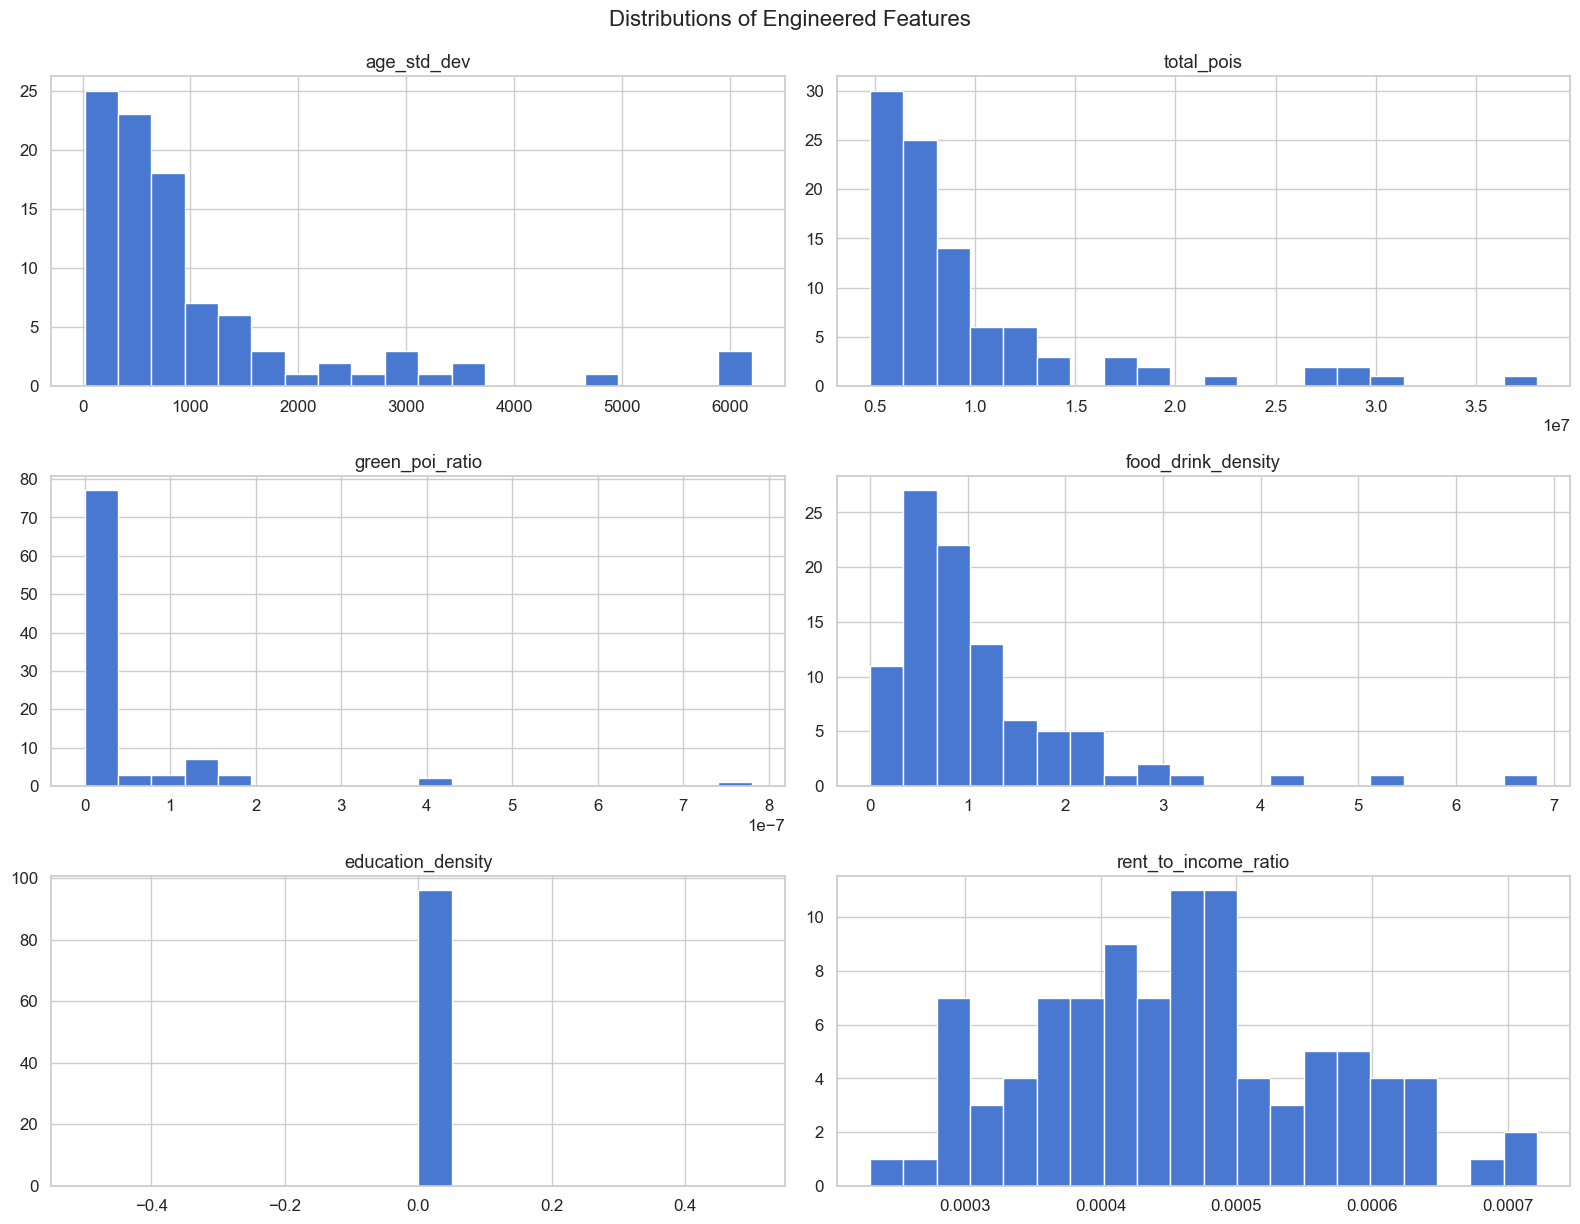

In [22]:
# Histogram engineered features
feature_cols = ["age_std_dev","total_pois", "green_poi_ratio", "food_drink_density", "education_density", "rent_to_income_ratio"]

df[feature_cols].hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.suptitle("Distributions of Engineered Features", y=1.02, fontsize=16)
plt.show()

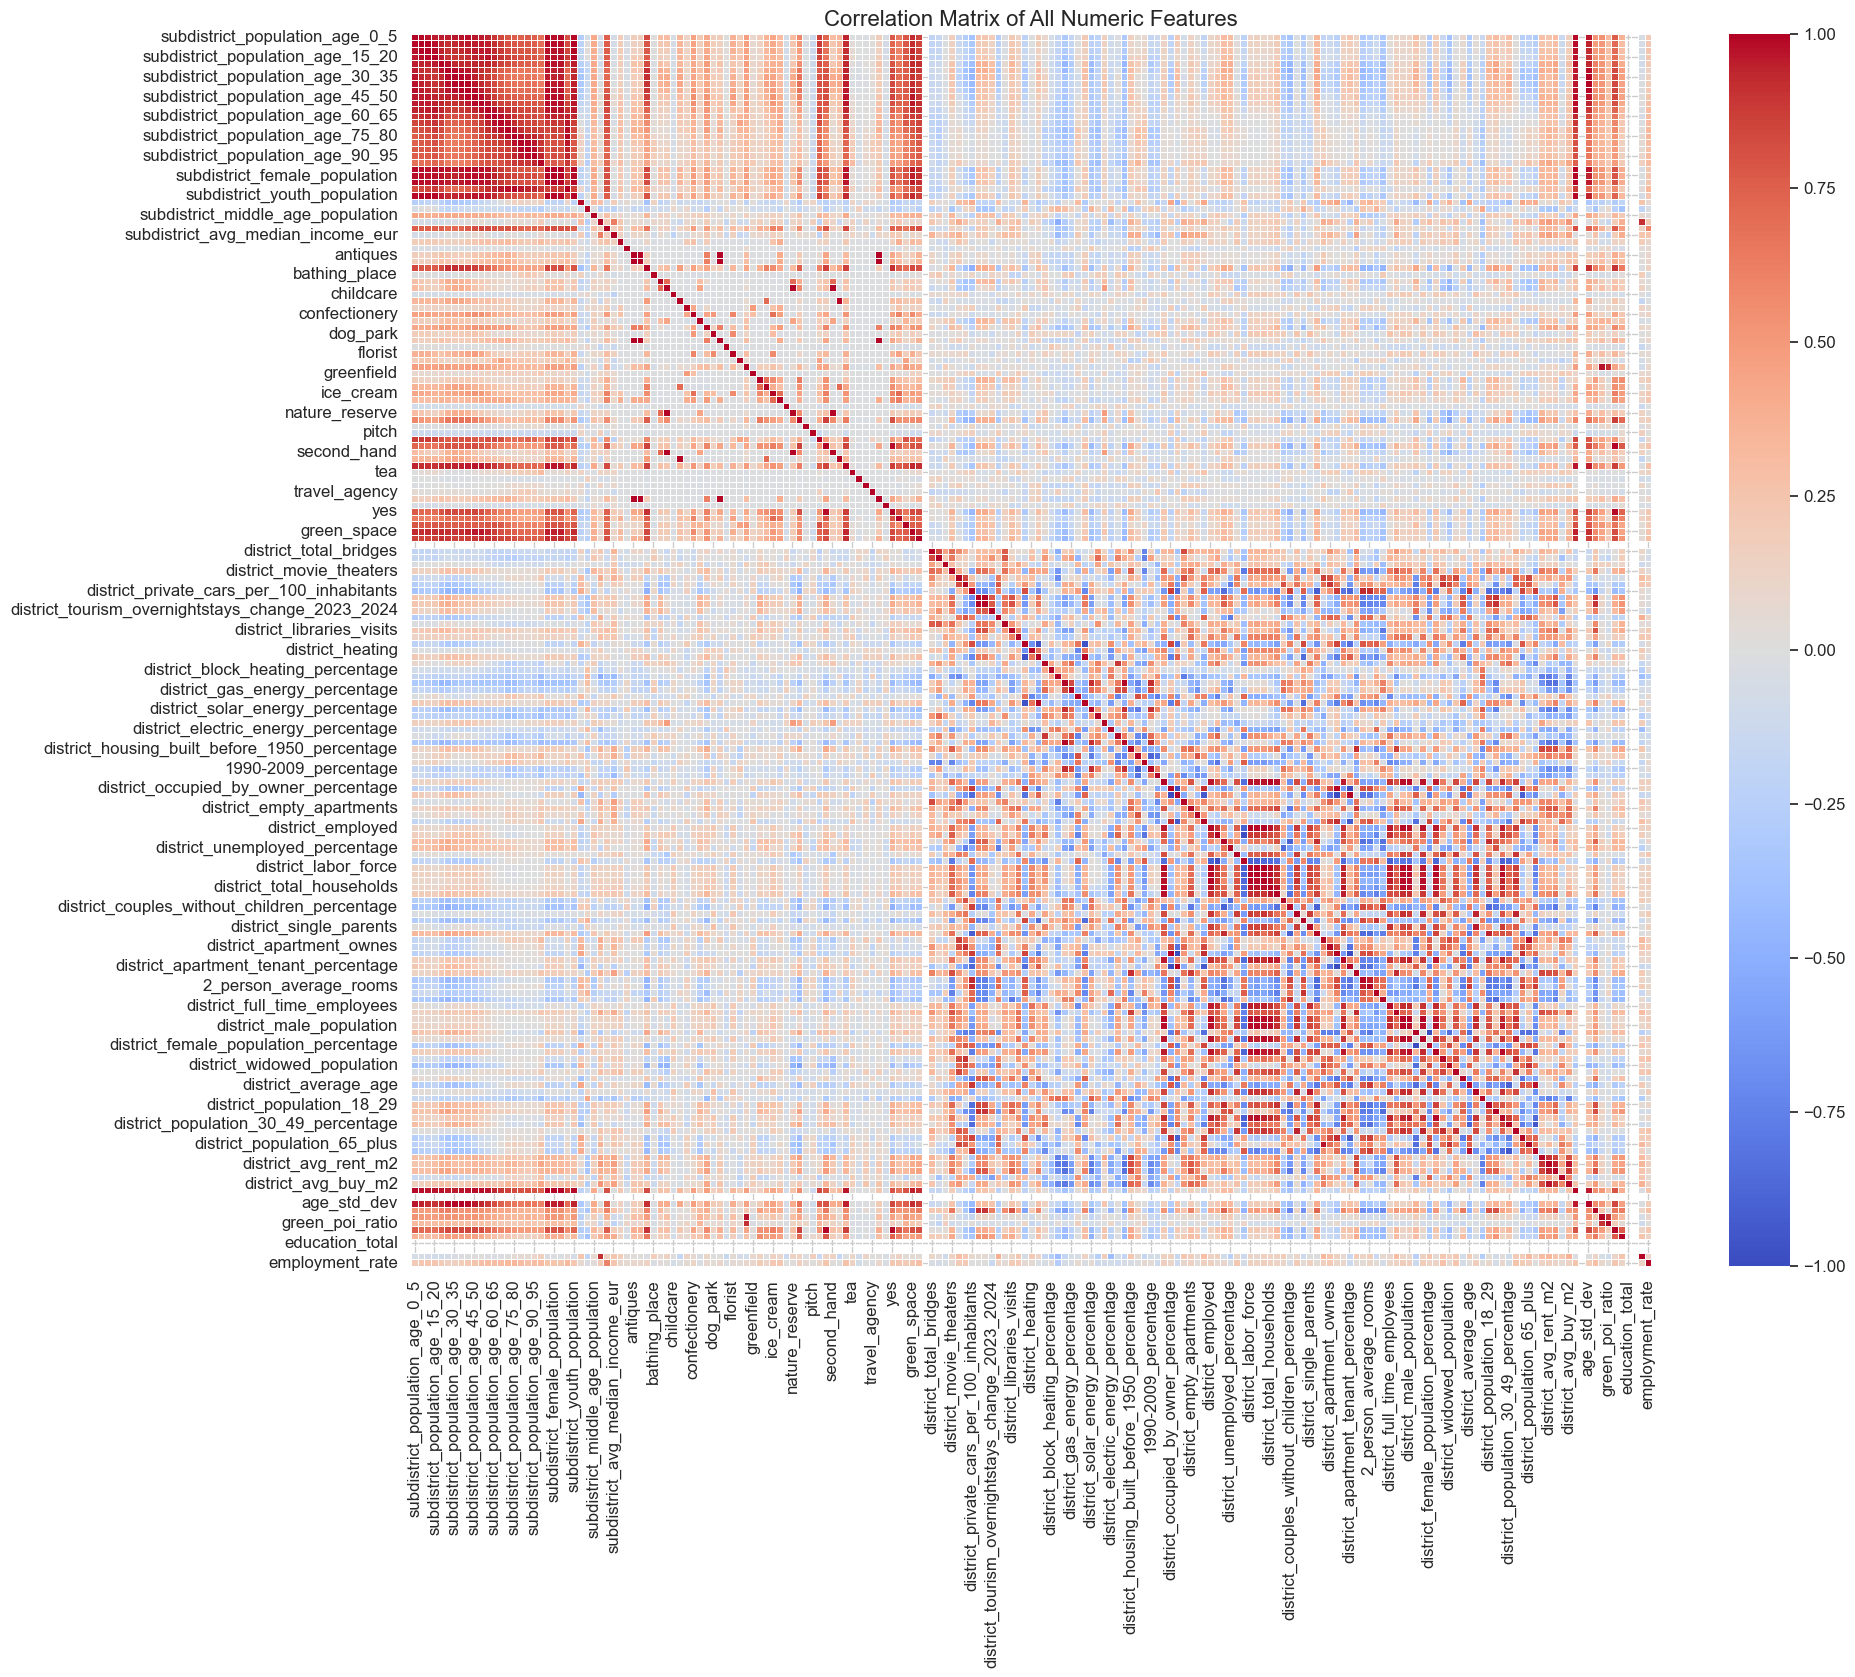

In [24]:
# Compute correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Set up large figure for readability
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of All Numeric Features", fontsize=16)
plt.show()

In [25]:
target_corrs = corr_matrix["rent_to_income_ratio"].sort_values(ascending=False)
print(target_corrs)

rent_to_income_ratio                          1.000000
subdistrict_avg_mietspiegel_classification    0.906589
district_street_trees                         0.388447
district_avg_buy_m2                           0.367821
district_avg_rent_m2                          0.340248
                                                ...   
district_electric_energy_percentage          -0.413752
medical                                            NaN
pop_diff                                           NaN
education_total                                    NaN
education_density                                  NaN
Name: rent_to_income_ratio, Length: 187, dtype: float64


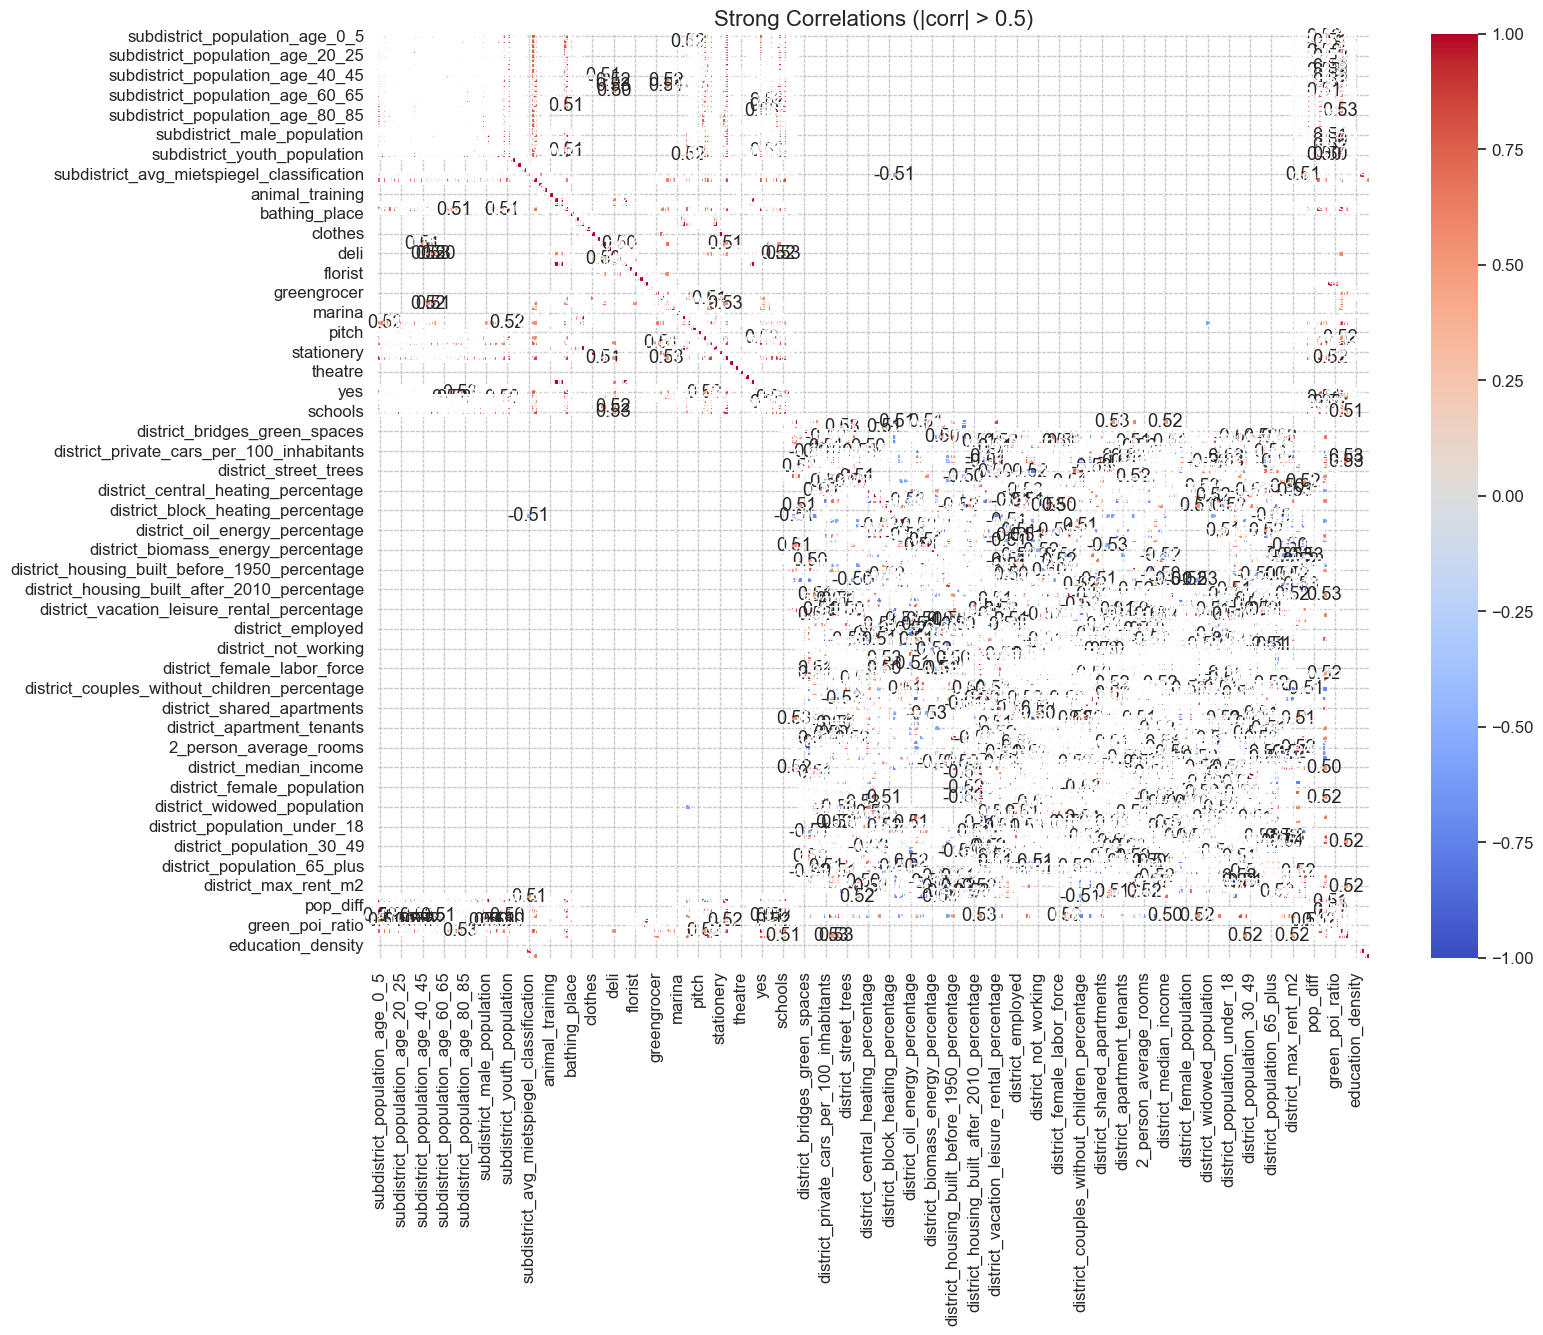

In [26]:
# Compute full correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Mask weak correlations: set anything between -0.5 and 0.5 to NaN for clarity
strong_corr = corr_matrix.mask(corr_matrix.abs() < 0.5)

# Plot heatmap of strong correlations only
plt.figure(figsize=(16, 12))
sns.heatmap(
    strong_corr, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0, 
    linewidths=0.5, 
    cbar=True
)
plt.title("Strong Correlations (|corr| > 0.5)", fontsize=16)
plt.show()

In [27]:
# Correlation with a target feature (example: rent_to_income_ratio)
target_corr = corr_matrix["rent_to_income_ratio"]

# Filter and sort
strong_target_corr = target_corr[(target_corr.abs() > 0.5) & (target_corr.abs() < 1.0)].sort_values(ascending=False)

print("🔍 Strong Correlations with rent_to_income_ratio:")
print(strong_target_corr)

🔍 Strong Correlations with rent_to_income_ratio:
subdistrict_avg_mietspiegel_classification    0.906589
Name: rent_to_income_ratio, dtype: float64


# Scaling Features

In [29]:
df_features = df.drop(columns=["ortsteil", "bezirk", "subdistrict_avg_mietspiegel_classification", "classification_category"])

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

In [30]:
df_scaled.head()

,subdistrict_population_age_0_5,subdistrict_population_age_5_10,subdistrict_population_age_10_15,subdistrict_population_age_15_20,subdistrict_population_age_20_25,subdistrict_population_age_25_30,subdistrict_population_age_30_35,subdistrict_population_age_35_40,subdistrict_population_age_40_45,subdistrict_population_age_45_50,subdistrict_population_age_50_55,subdistrict_population_age_55_60,subdistrict_population_age_60_65,subdistrict_population_age_65_70,subdistrict_population_age_70_75,subdistrict_population_age_75_80,subdistrict_population_age_80_85,subdistrict_population_age_85_90,subdistrict_population_age_90_95,subdistrict_population_age_95_plus,subdistrict_male_population,subdistrict_female_population,total_population,subdistrict_senior_population,subdistrict_youth_population,subdistrict_senior_share,subdistrict_youth_share,subdistrict_middle_age_population,subdistrict_total_full_time_employees,subdistrict_avg_median_income_eur,alcohol,animal_training,antiques,art,bar,bathing_place,books,butcher,childcare,clothes,community_centre,confectionery,convenience,deli,dog_park,electronics,fitness_station,florist,fountain,garden,greenfield,greengrocer,hairdresser,ice_cream,kiosk,marina,nature_reserve,nightclub,parking,pitch,playground,restaurant,second_hand,stationery,supermarket,tea,art.1,theatre,travel_agency,vacant,wine,yes,cafes,bakeries,green_space,schools,medical,district_total_bridges,district_bridges_city_streets,district_bridges_green_spaces,district_movie_theaters,district_total_cars,district_private_cars,district_private_cars_per_100_inhabitants,district_tourism_guests_2024,district_tourism_overnightstays_2024,district_tourism_overnightstays_change_2023_2024,district_street_trees,district_libraries,district_libraries_visits,district_libraries_borrowings,district_central_heating_percentage,district_heating,district_heating_percentage,district_floor_heating_percentage,district_block_heating_percentage,district_stove_heating_percentage,district_no_heating_percentage,district_gas_energy_percentage,district_oil_energy_percentage,district_mixed_energy_sources_percentage,district_solar_energy_percentage,district_wood_pellets_energy_percentage,district_biomass_energy_percentage,district_electric_energy_percentage,district_coal_energy_percentage,district_no_energy_source_percentage,district_housing_built_before_1950_percentage,1950-1969_percentage,1970-1989_percentage,1990-2009_percentage,district_housing_built_after_2010_percentage,district_total_apartments,district_occupied_by_owner_percentage,district_residential_rental_percentage,district_vacation_leisure_rental_percentage,district_empty_apartments,district_empty_apartments_percentage,district_average_living_space_m2,district_employed,district_employed_percentage,district_unemployed,district_unemployed_percentage,district_not_working,district_not_working_percentage,district_labor_force,district_male_labor_force,district_female_labor_force,district_total_households,district_single_households,district_couples_without_children,district_couples_without_children_percentage,district_couples_with_children,district_couples_with_children_percentage,district_single_parents,district_shared_apartments,district_only_seniors_households,district_apartment_ownes,district_apartment_owner_percentage,district_apartment_tenants,district_apartment_tenant_percentage,2_person_EUR_per_squared_meter,district_apartment_average_rooms,2_person_average_rooms,district_average_persons_per_household,district_average_years_of_residence,district_full_time_employees,district_median_income,district_total_population,district_male_population,district_male_population_percentage,district_female_population,district_female_population_percentage,district_single_population,district_couples_population,district_widowed_population,district_divorced_population,district_other_civil_status_population,district_average_age,district_population_under_18,district_population_under_18_percentage,district_population_18_29,distric

# PCA Dimensionality Reduction

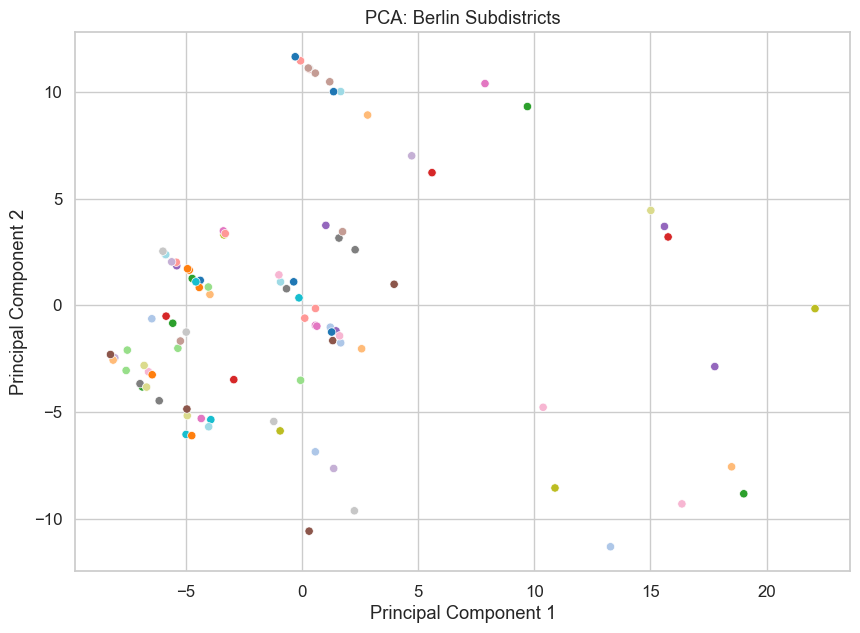

In [32]:
# Keep 2 components to visualize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Turn into DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["ortsteil"] = df["ortsteil"].values  # Add back labels for tracking

# Visualize PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="ortsteil", palette="tab20", legend=False)
plt.title("PCA: Berlin Subdistricts")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [33]:
# Check variance explained
explained = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained[0]:.2%}, {explained[1]:.2%}")
print(f"Total explained by 2 components: {explained.sum():.2%}")

Explained variance by PC1 and PC2: 25.93%, 16.10%
Total explained by 2 components: 42.04%


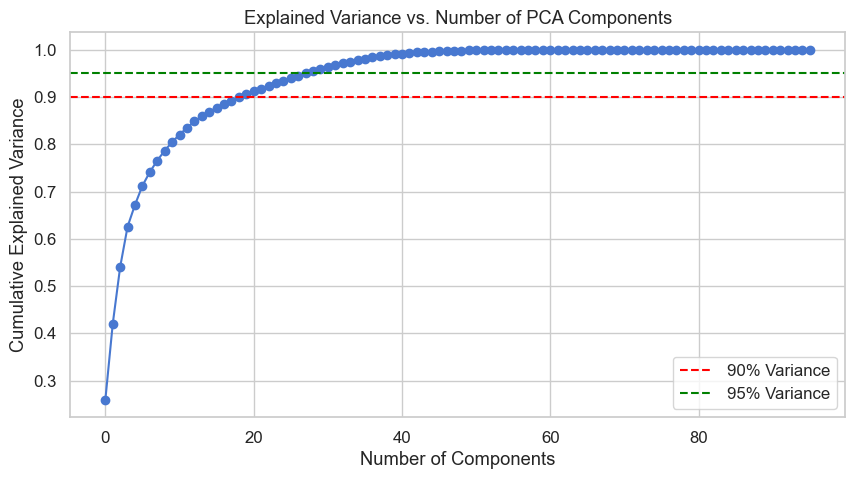

In [34]:
pca_full = PCA().fit(df_scaled)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
plt.axhline(0.9, color='red', linestyle='--', label='90% Variance')
plt.axhline(0.95, color='green', linestyle='--', label='95% Variance')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of PCA Components")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Select number of components to retain 90% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1  # this gives 24 or so
X_pca_final = X_pca[:, :n_components]

In [41]:
import os

# Create the folder if it doesn't exist
os.makedirs("../data/modeling_data", exist_ok=True)

# Save the file
df_pca_final.to_csv("../data/modeling_data/berlin_subdistricts_pca.csv", index=False)
print("✅ PCA-transformed data saved!")

✅ PCA-transformed data saved!
